# EMAIL SPAM DETECTION

# INTRODUCTION

In today’s globalized world, email is a primary source of communication. This communication can vary from personal, business, corporate to government. With the rapid increase in email usage, there has also been increase in the SPAM emails. SPAM emails, also known as junk email involves nearly identical messages sent to numerous recipients by email. Apart from being annoying, spam emails can also pose a security threat to computer system. It is estimated that spam cost businesses on the order of $100 billion in 2007. In this project, we use text mining to perform automatic spam filtering to use emails effectively. We try to identify patterns using Data-mining classification algorithms to enable us classify the emails as HAM or SPAM

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
# size of a dataframe
data.shape

(5572, 5)

In [4]:
data.head(6)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN


# data cleaning

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled. If data is incorrect, outcomes and algorithms are unreliable, even though they may look correct. There is no one absolute way to prescribe the exact steps in the data cleaning process because the processes will vary from dataset to dataset. But it is crucial to establish a template for your data cleaning process so you know you are doing it the right way every time.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# drop a unnecessary columns
data.drop(columns =['Unnamed: 2 ','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
# rename a columns bt another name
data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [11]:
data.head(2)

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN


# Label Encoding 

Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project.

In [13]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
encoder = LabelEncoder()

# Fit and transform the target column
data['target'] = encoder.fit_transform(data['target'])

After applying fit_transform(), the encoded column would contain numerical values representing the original categorical labels.



In [14]:
data.head(2)

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN


In [15]:
#Checking missing values
data.isnull().sum()

target           0
text             0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [16]:
#cheking duplicated values
data.duplicated().sum()

403

In [17]:
# Drop duplicate values
print("Before removing duplicates:", data.shape)
data.drop_duplicates(keep='first', inplace=True)
print("After removing duplicates:", data.shape)


Before removing duplicates: (5572, 5)
After removing duplicates: (5169, 5)


# EXPLORATORY DATA ANAlysis 

Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

<Axes: >

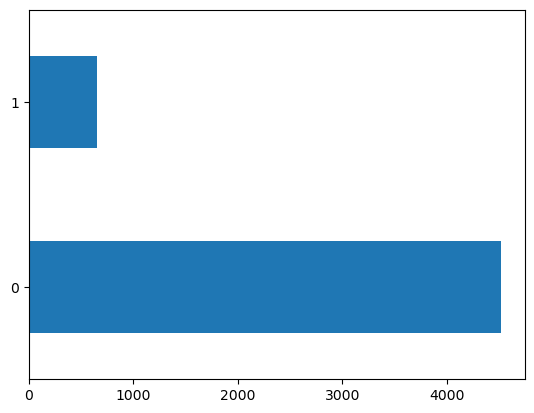

In [18]:
# Check counts of ham and spam
data['target'].value_counts().plot(kind='barh')

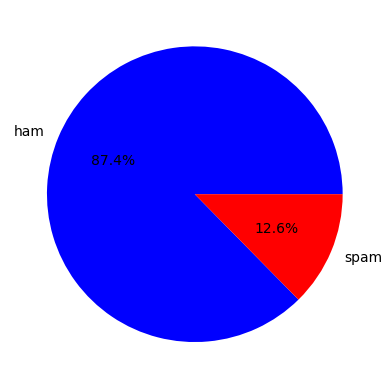

In [19]:
# Create a pie chart with custom colors
colors = ['blue', 'red']
plt.pie(data["target"].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%', colors=colors)
plt.show()

Now,lets add three new columns

1.num_characters : which counts how many characters are there in each text row

2.num_words : which counts how many words are there in each text row

3.num_sentences: which counts how many sentence are there in each text row

In [32]:
  import nltk
  nltk.download('punkt')
def count_features(text):
    num_characters = len(text)
    num_words = len(nltk.word_tokenize(text))
    num_sentences = len(nltk.sent_tokenize(text))
    return num_characters, num_words, num_sentences

data[['num_characters', 'num_words', 'num_sentences']] = data['text'].apply(lambda x: pd.Series(count_features(x)))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vedant\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
data.head(2)

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2


In [33]:
#overall(ham and spam)
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


num_characters: Mean: 79, Std: 58, Min: 2, Max: 910, 25th percentile: 36, 75th percentile: 117.

num_words: Mean: 18, Std: 13, Min: 1, Max: 219, 25th percentile: 9, 75th percentile: 26.

num_sentences: Mean: 2, Std: 1.4, Min: 1, Max: 38, 25th percentile: 1, 75th percentile: 2.

In [34]:
# ham
data[data['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [35]:
# spam
data[data['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


Spam messages have higher average counts for characters, words, and sentences than ham messages. They also have lower standard deviations, indicating less variability. This suggests that spam messages are typically longer and contain more words and sentences than ham messages

visualization
data visualization is the representation of data through use of common graphics, such as charts, plots, infographics, and even animations.

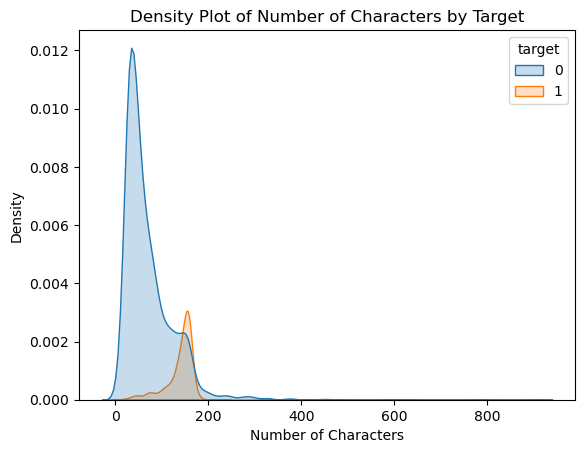

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data=data, x='num_characters', hue='target', fill=True)

plt.xlabel('Number of Characters')
plt.ylabel('Density')
plt.title('Density Plot of Number of Characters by Target')

plt.show()

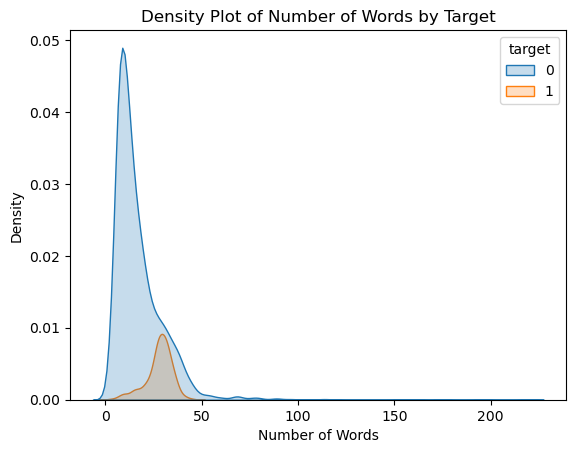

In [37]:
sns.kdeplot(data=data, x='num_words', hue='target', fill=True)

plt.xlabel('Number of Words')
plt.ylabel('Density')
plt.title('Density Plot of Number of Words by Target')

plt.show()

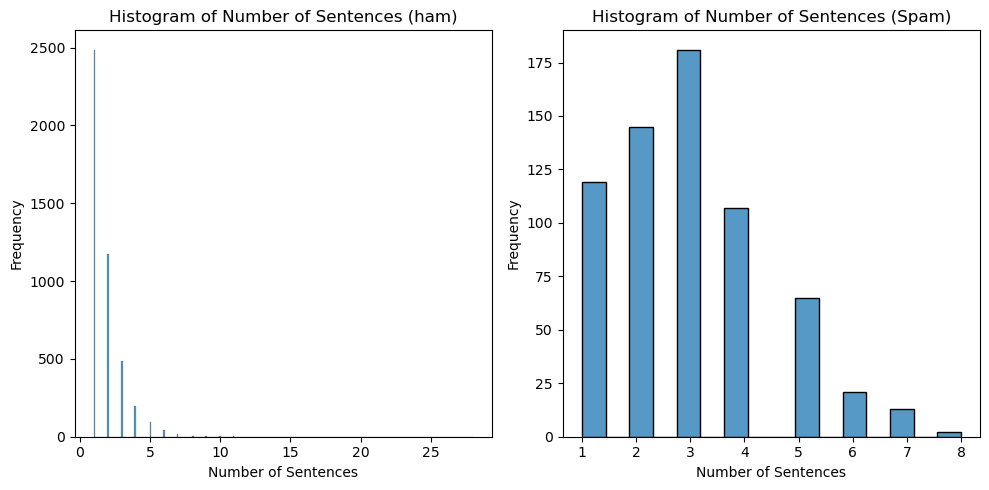

In [38]:
# for num_sentences

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot for non-spam messages
sns.histplot(data[data['target'] == 0]['num_sentences'], ax=axes[0])
axes[0].set_xlabel('Number of Sentences')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Number of Sentences (ham)')

# Plot for spam messages
sns.histplot(data[data['target'] == 1]['num_sentences'], ax=axes[1])
axes[1].set_xlabel('Number of Sentences')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Number of Sentences (Spam)')

plt.tight_layout()
plt.show()

In [39]:
#finding correlation
data.corr()

C:\Users\Vedant\AppData\Local\Temp\ipykernel_16192\1730628687.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


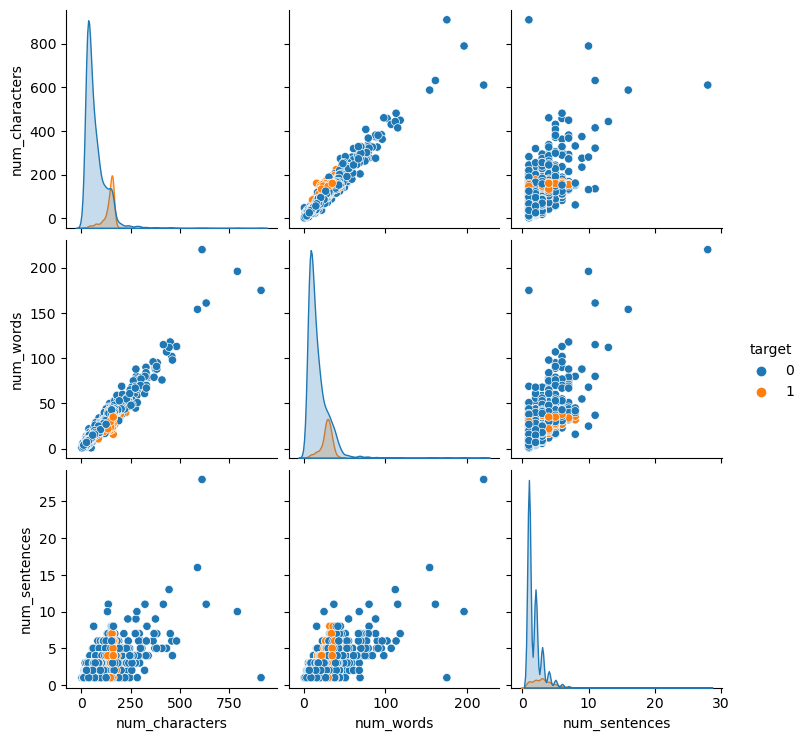

In [40]:
sns.pairplot(data=data, vars=['num_characters', 'num_words', 'num_sentences'], hue='target')

plt.show()

# observation

Correlation between 'target' and other variables:
target' has a positive correlation of 0.38 with 'num_characters.
target' has a positive correlation of 0.26 with 'num_words.
target' has a positive correlation of 0.27 with 'num_sentences.
Correlation between the numerical variables:
num_characters' and 'num_words' have a strong positive correlation of 0.97.
num_characters' and 'num_sentences' have a moderate positive correlation of 0.63.
num_words' and 'num_sentences' have a moderate positive correlation of 0.68.
Overall, the length of the message is somewhat correlated with the likelihood of it being classified as spam. There are also correlations between the different length measures themselves.